# Introduction to K-Means Clustering

## Learning Objectives
By the end of this notebook, you will be able to:
- Understand the fundamental concepts of k-means clustering
- Implement k-means clustering using scikit-learn
- Evaluate clustering performance using various metrics
- Visualize clustering results
- Apply k-means to different types of datasets

## 1. Introduction to Clustering

Clustering is an unsupervised learning technique that groups similar data points together. K-means is one of the most popular clustering algorithms due to its simplicity and effectiveness.

### How K-Means Works:
1. **Initialize** k cluster centers randomly
2. **Assign** each data point to the nearest cluster center
3. **Update** cluster centers as the mean of assigned points
4. **Repeat** steps 2-3 until convergence

## 2. Setup and Imports

In [1]:
# Standard imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score, davies_bouldin_score
import warnings
warnings.filterwarnings('ignore')

# Set random seed for reproducibility
np.random.seed(42)

# Configure visualization settings
plt.style.use('seaborn-darkgrid')
sns.set_palette("husl")

/Users/argonneed/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


## 3. Load and Explore Your Dataset

### Option A: Use a Built-in Dataset (Iris Example)

In [ ]:
# Example with Iris dataset
from sklearn.datasets import load_iris
iris = load_iris()
X = iris.data
feature_names = iris.feature_names

# Create DataFrame for easier manipulation
df = pd.DataFrame(X, columns=feature_names)
print("Dataset shape:", df.shape)
df.head()

### Option B: Load Your Own Dataset

In [8]:
# Uncomment and modify for your dataset
df = pd.read_csv('../data/penguins.csv')

# Select features for clustering (modify as needed)
feature_columns = ['culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm', 'body_mass_g']  # Replace with your column names
X = df[feature_columns].values

print("Dataset shape:", df.shape)
df.head()

Dataset shape: (344, 5)


,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,39.1,18.7,181.0,3750.0,MALE
1,39.5,17.4,186.0,3800.0,FEMALE
2,40.3,18.0,195.0,3250.0,FEMALE
3,NaN,NaN,NaN,NaN,NaN
4,36.7,19.3,193.0,3450.0,FEMALE


In [12]:
del df['sex']

In [13]:
df.head()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
0,39.1,18.7,181.0,3750.0
1,39.5,17.4,186.0,3800.0
2,40.3,18.0,195.0,3250.0
4,36.7,19.3,193.0,3450.0
5,39.3,20.6,190.0,3650.0


### Data Exploration

In [20]:
# Basic statistics
print("Dataset Statistics:")
print(df.describe())

# Check for missing values
print("\nMissing values:")
print(df.isnull().sum())

Dataset Statistics:
       culmen_length_mm  culmen_depth_mm  flipper_length_mm  body_mass_g
count        335.000000       335.000000         335.000000   335.000000
mean          43.988358        17.169552         214.355224  4209.179104
std            5.453430         1.971966         263.253508   803.633495
min           32.100000        13.100000        -132.000000  2700.000000
25%           39.500000        15.600000         190.000000  3550.000000
50%           44.500000        17.300000         197.000000  4050.000000
75%           48.550000        18.700000         213.000000  4787.500000
max           59.600000        21.500000        5000.000000  6300.000000

Missing values:
culmen_length_mm     0
culmen_depth_mm      0
flipper_length_mm    0
body_mass_g          0
dtype: int64


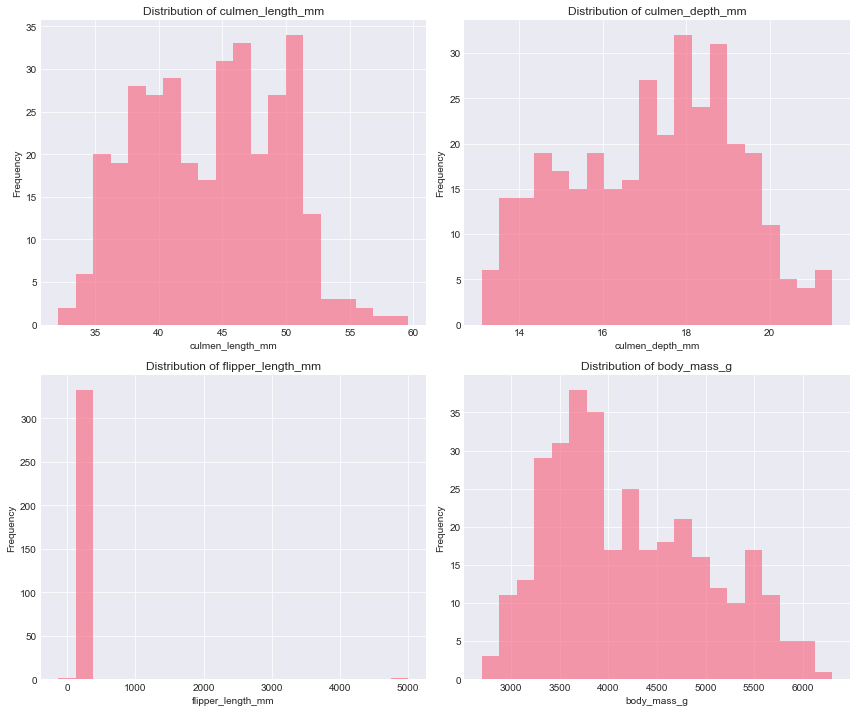

In [21]:
# Visualize feature distributions
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
axes = axes.ravel()

for idx, col in enumerate(df.columns[:4]):  # Adjust based on your features
    axes[idx].hist(df[col], bins=20, alpha=0.7)
    axes[idx].set_title(f'Distribution of {col}')
    axes[idx].set_xlabel(col)
    axes[idx].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

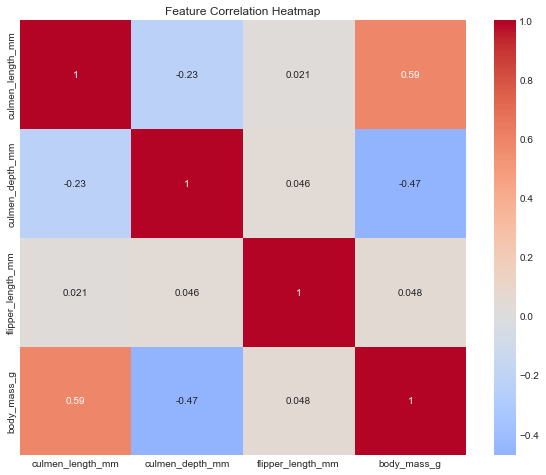

In [16]:
# Correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', center=0)
plt.title('Feature Correlation Heatmap')
plt.show()

## 4. Data Preprocessing

In [17]:
# Handle missing values if any
df = df.dropna()  # or use df.fillna() with appropriate strategy
df.head()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
0,39.1,18.7,181.0,3750.0
1,39.5,17.4,186.0,3800.0
2,40.3,18.0,195.0,3250.0
4,36.7,19.3,193.0,3450.0
5,39.3,20.6,190.0,3650.0


In [18]:
# Feature scaling (important for k-means!)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df)

print("Original data range:")
print(f"Min: {X.min()}, Max: {X.max()}")
print("\nScaled data range:")
print(f"Min: {X_scaled.min():.2f}, Max: {X_scaled.max():.2f}")

Original data range:
Min: nan, Max: nan

Scaled data range:
Min: -2.18, Max: 18.21


# 5. Determining Optimal Number of Clusters

### Elbow Method

In [19]:
# Calculate inertia for different values of k
inertias = []
K_range = range(1, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    inertias.append(kmeans.inertia_)

# Plot elbow curve
plt.figure(figsize=(10, 6))
plt.plot(K_range, inertias, 'bo-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.grid(True)
plt.show()

AttributeError: 'NoneType' object has no attribute 'split'

### Silhouette Analysis

In [ ]:
# Calculate silhouette scores for different k
silhouette_scores = []

for k in range(2, 11):  # Silhouette score requires at least 2 clusters
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(X_scaled)
    silhouette_scores.append(silhouette_score(X_scaled, labels))

# Plot silhouette scores
plt.figure(figsize=(10, 6))
plt.plot(range(2, 11), silhouette_scores, 'go-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score for Different k Values')
plt.grid(True)
plt.show()

# Print best k based on silhouette score
best_k = np.argmax(silhouette_scores) + 2  # +2 because we started from k=2
print(f"Best k based on Silhouette Score: {best_k}")

## 6. Applying K-Means Clustering

In [ ]:
# Choose optimal k based on your analysis
optimal_k = 3  # Modify based on your elbow/silhouette analysis

# Apply k-means
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
cluster_labels = kmeans.fit_predict(X_scaled)

# Add cluster labels to dataframe
df['Cluster'] = cluster_labels

print(f"Number of points in each cluster:")
print(df['Cluster'].value_counts().sort_index())

## 7. Visualizing Clustering Results

### 2D Visualization using PCA

In [ ]:
# Reduce dimensions for visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Create visualization
plt.figure(figsize=(12, 8))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], 
                     c=cluster_labels, 
                     cmap='viridis', 
                     s=50, 
                     alpha=0.6)

# Plot cluster centers
centers_pca = pca.transform(kmeans.cluster_centers_)
plt.scatter(centers_pca[:, 0], centers_pca[:, 1], 
           c='red', 
           s=300, 
           alpha=0.8, 
           marker='X',
           edgecolors='black',
           linewidth=2)

plt.xlabel(f'First Principal Component ({pca.explained_variance_ratio_[0]:.2%} variance)')
plt.ylabel(f'Second Principal Component ({pca.explained_variance_ratio_[1]:.2%} variance)')
plt.title('K-Means Clustering Results (PCA Visualization)')
plt.colorbar(scatter, label='Cluster')
plt.grid(True, alpha=0.3)
plt.show()

### Pairwise Feature Plots

In [ ]:
# Select features to plot (modify based on your dataset)
features_to_plot = df.columns[:4]  # First 4 features

# Create pairplot
g = sns.pairplot(df[list(features_to_plot) + ['Cluster']], 
                 hue='Cluster', 
                 palette='viridis',
                 diag_kind='kde',
                 plot_kws={'alpha': 0.6})
g.fig.suptitle('Pairwise Feature Relationships by Cluster', y=1.02)
plt.show()

## 8. Cluster Analysis and Interpretation

### Cluster Characteristics

In [ ]:
# Calculate cluster statistics
cluster_summary = df.groupby('Cluster').agg(['mean', 'std'])
print("Cluster Summary Statistics:")
print(cluster_summary)

In [ ]:
# Visualize cluster characteristics
fig, axes = plt.subplots(1, optimal_k, figsize=(15, 5))
if optimal_k == 1:
    axes = [axes]

for cluster in range(optimal_k):
    cluster_data = df[df['Cluster'] == cluster]
    feature_means = cluster_data.drop('Cluster', axis=1).mean()
    
    axes[cluster].bar(range(len(feature_means)), feature_means.values)
    axes[cluster].set_xticks(range(len(feature_means)))
    axes[cluster].set_xticklabels(feature_means.index, rotation=45, ha='right')
    axes[cluster].set_title(f'Cluster {cluster} (n={len(cluster_data)})')
    axes[cluster].set_ylabel('Mean Value')

plt.tight_layout()
plt.show()

### Cluster Quality Metrics

In [ ]:
# Calculate clustering metrics
silhouette_avg = silhouette_score(X_scaled, cluster_labels)
davies_bouldin = davies_bouldin_score(X_scaled, cluster_labels)
inertia = kmeans.inertia_

print(f"Clustering Quality Metrics:")
print(f"Silhouette Score: {silhouette_avg:.3f}")
print(f"Davies-Bouldin Index: {davies_bouldin:.3f}")
print(f"Inertia: {inertia:.3f}")
print("\nInterpretation:")
print("- Silhouette Score: Ranges from -1 to 1. Higher is better.")
print("- Davies-Bouldin Index: Lower is better. Measures cluster separation.")
print("- Inertia: Lower is better. Measures within-cluster sum of squares.")

## 9. Advanced Analysis (Optional)

### Cluster Stability Analysis

In [ ]:
# Test clustering stability with different initializations
n_runs = 10
labels_collection = []

for i in range(n_runs):
    kmeans_temp = KMeans(n_clusters=optimal_k, random_state=i, n_init=1)
    labels_temp = kmeans_temp.fit_predict(X_scaled)
    labels_collection.append(labels_temp)

# Calculate consistency
from sklearn.metrics import adjusted_rand_score
consistency_scores = []
for i in range(1, n_runs):
    score = adjusted_rand_score(labels_collection[0], labels_collection[i])
    consistency_scores.append(score)

print(f"Average Clustering Consistency: {np.mean(consistency_scores):.3f}")
print(f"Std Dev: {np.std(consistency_scores):.3f}")

### Feature Importance for Clustering

In [ ]:
# Calculate feature importance based on cluster separation
feature_importance = []
for i in range(X_scaled.shape[1]):
    # Calculate between-cluster variance for each feature
    cluster_means = []
    for cluster in range(optimal_k):
        cluster_mask = cluster_labels == cluster
        cluster_means.append(X_scaled[cluster_mask, i].mean())
    
    between_cluster_var = np.var(cluster_means)
    feature_importance.append(between_cluster_var)

# Visualize feature importance
plt.figure(figsize=(10, 6))
feature_names_list = list(df.columns[:-1])  # Exclude 'Cluster' column
plt.bar(range(len(feature_importance)), feature_importance)
plt.xticks(range(len(feature_importance)), feature_names_list, rotation=45, ha='right')
plt.xlabel('Features')
plt.ylabel('Between-Cluster Variance')
plt.title('Feature Importance for Clustering')
plt.tight_layout()
plt.show()

## 10. Save Results

In [ ]:
# Save clustered data
df.to_csv('clustered_data.csv', index=False)
print("Clustered data saved to 'clustered_data.csv'")

# Save cluster centers
cluster_centers_df = pd.DataFrame(
    scaler.inverse_transform(kmeans.cluster_centers_),
    columns=df.columns[:-1]  # Exclude 'Cluster' column
)
cluster_centers_df.to_csv('cluster_centers.csv', index=False)
print("Cluster centers saved to 'cluster_centers.csv'")

## 11. Key Takeaways and Best Practices

### When to Use K-Means:
- Data has spherical clusters
- Clusters have similar sizes
- Clusters have similar densities
- You know the approximate number of clusters

### Limitations:
- Sensitive to outliers
- Assumes spherical clusters
- Requires specifying k in advance
- Results depend on initialization

### Tips for Better Results:
1. **Always scale your data** before applying k-means
2. **Try multiple k values** and use validation metrics
3. **Run k-means multiple times** with different initializations
4. **Consider other algorithms** if clusters are non-spherical (DBSCAN, hierarchical clustering)
5. **Validate results** with domain knowledge

## 12. Exercises

1. **Exercise 1:** Try different scaling methods (MinMaxScaler, RobustScaler) and compare results
2. **Exercise 2:** Implement k-means++ initialization manually
3. **Exercise 3:** Add outlier detection before clustering
4. **Exercise 4:** Compare k-means with other clustering algorithms (DBSCAN, Agglomerative)
5. **Exercise 5:** Create a function to automatically determine optimal k

## References
- [Scikit-learn K-Means Documentation](https://scikit-learn.org/stable/modules/clustering.html#k-means)
- [Understanding K-Means Clustering](https://towardsdatascience.com/understanding-k-means-clustering-in-machine-learning-6a6e67336aa1)
- MacQueen, J. B. (1967). "Some Methods for classification and Analysis of Multivariate Observations"